# Question 5

In [1]:
# Load necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas
%matplotlib inline

(410, 990, 3)
112


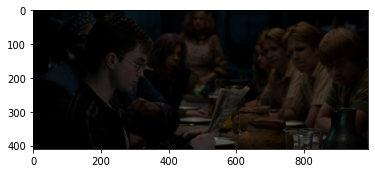

In [2]:
lowLight = cv2.imread("../images/phoenix-bad.jpg")
lowLight = cv2.cvtColor(lowLight, cv2.COLOR_BGR2RGB)
plt.imshow(lowLight)
print(lowLight.shape)
print(np.max(lowLight))

In [3]:
def drawHistogram(img):
    imgC = np.copy(img)
    imgC = imgC.ravel()
    his = np.zeros(256)
    for i in imgC:
        his[i] = his[i] + 1
    return his 

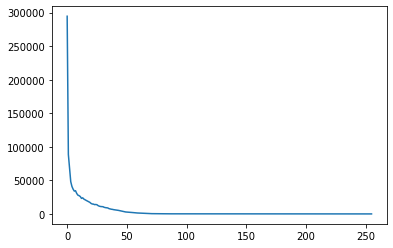

In [4]:
histg = drawHistogram(lowLight) 
# show the plotting graph of an image
plt.plot(histg)
plt.show()

In [5]:
# Linear Contrast
def linContrastStretching(img,a,b):
    aMax = np.amax(img, axis=None)
    aMin = np.amin(img, axis=None)
    imgContrast = np.round(((((img - aMin)/(aMax - aMin)) * (b-a)) + a),decimals=0).astype(np.uint8)
    return imgContrast

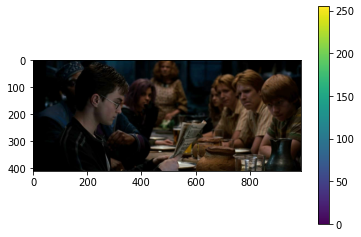

In [6]:
lT = np.copy(lowLight)
out = linContrastStretching(lT,0,255)
plt.imshow(out)
plt.ion()
plt.colorbar()
plt.show()
# cv2.imwrite("5.jpg",cv2.cvtColor(out,cv2.COLOR_RGB2BGR))

(410, 990, 3)


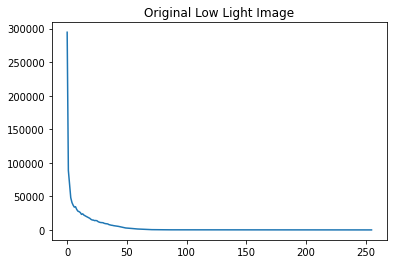

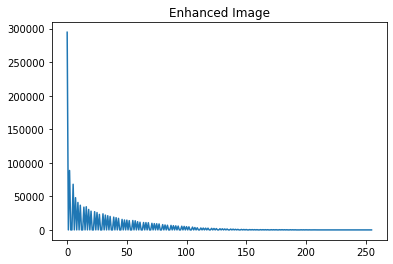

In [7]:
print(out.shape)
out = cv2.cvtColor(out,cv2.COLOR_RGB2BGR)
histg1 = drawHistogram(lowLight)
histg2 = drawHistogram(out)
# show the plotting graph of an image
# plt.plot(histg)
plt.plot(histg1)
plt.title("Original Low Light Image")
plt.show()
# plt.plot(histg)
plt.plot(histg2)
plt.title("Enhanced Image")
plt.show()

#### <b>Proof of improved constrast</b>

In [8]:
srcMin = np.min(lowLight)
srcMax = np.max(lowLight)
outMin = np.min(out)
outMax = np.max(out)
print("Input Image minimum intensity value: "+str(srcMin))
print("Input Image maximum intensity value: "+str(srcMax))
print("Output Image minimum intensity value: "+str(outMin))
print("Output Image maximum intensity value: "+str(outMax))

Input Image minimum intensity value: 0
Input Image maximum intensity value: 112
Output Image minimum intensity value: 0
Output Image maximum intensity value: 255


From above output, we see that in the low light image, the maximum intensity value of the image is 112 whereas after linear contrast strecthing, the maximum intensity value is stretched to 255 while lower limit stays the same.

This shows that there is a larger intensity range which helps in increasing the contrast of the image thereby improving the image.